In [ ]:
import pandas as pd
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
import ta
from dataclasses import dataclass
import numpy as np

sns.set_theme()

In [14]:
data = pd.read_csv(r"C:\Users\renat\Desktop\Trading\Effective Spread - T2\aapl_5m_train.csv").dropna()

In [ ]:
@dataclass

class Position: 
    ticker: str
    n_shares: int
    price: float 
    sl: float 
    tp: float 
    time: str 

In [ ]:
def objective(trial, data) -> float:
    data = data.copy()
    
    rsi_window = trial.suggest_int("rsi_window", 8, 80)
    rsi_lower = trial.suggest_int("rsi_lower", 5, 35)
    stop_loss = trial.suggest_float("stop_loss", 0.01, 0.15)
    take_profit = trial.suggest_float("take_profit", 0.01, 0.15)
    n_shares = trial.suggest_int("n_shares", 5, 500)

    rsi_ind = ta.momentum.RSIIndicator(data.Close, window=rsi_window)    

    data['rsi'] = rsi_ind.rsi()
    data['buy_signal'] = data['rsi'] < rsi_lower
    # data['sell_signal'] = data['rsi'] > 80

    data = data.dropna()

    COM = 0.125/100
    BORROW_RATE = 0.25/100
    STOP_LOSS = stop_loss
    TAKE_PROFIT = take_profit
    N_SHARES = n_shares

    capital = 1_000_000
    active_long_positions: list[Position] = []
    portfolio_value: list[float] = [capital]

    for i, row in data.iterrows():
        # - LONG - #
        # Check active orders
        for position in active_long_positions.copy():
            # Stop loss or take profit check
            if row.Close > position.tp or row.Close < position.sl:
                # Add profits / losses to capital
                capital += row.Close * position.n_shares * (1 - COM)
                # Remove position from active pos
                active_long_positions.remove(position)

        # Check signal
        if row.buy_signal:
            cost = row.Close * N_SHARES * (1 + COM)
            # Do we have enough capital?
            if capital > cost:
                # Discount cash
                capital -= cost
                #add position to portfolio
                pos = Position(ticker="AAPL", n_shares=N_SHARES, price=row.Close, sl=row.Close * (1 - STOP_LOSS),
                                tp=row.Close * (1 + TAKE_PROFIT), time=row.Datetime)
                active_long_positions.append(pos)

        current_value = len(active_long_positions) * row.Close * N_SHARES + capital
        portfolio_value.append(current_value)

    # At the end of the backtesting, we should close all the active positions
    capital += row.Close * len(active_long_positions) * N_SHARES * (1 - COM)
    active_long_positions = []

    df = pd.DataFrame()
    df["value"] = portfolio_value
    df["rets"] = df.value.pct_change()
    df.dropna(inplace=True)

    mean = df.rets.mean()
    std = df.rets.std()

    annual_rets = mean * (60/5) * (6.5) * (252)  # anualizado
    annual_std = std * np.sqrt((60/5) * (6.5) * (252))

    return annual_rets / annual_std

In [50]:
study = optuna.create_study(direction="maximize")
study.optimize(lambda trial: objective(trial, data), n_trials=50)


[I 2025-09-18 19:38:06,155] A new study created in memory with name: no-name-613cae62-ce05-493d-8dd8-337a3ad3957c
C:\Users\renat\AppData\Local\Temp\ipykernel_5028\1625049680.py:69: RuntimeWarning: invalid value encountered in scalar divide
  return annual_rets / annual_std
[W 2025-09-18 19:38:07,556] Trial 0 failed with parameters: {'rsi_window': 76, 'rsi_lower': 14, 'stop_loss': 0.06276361473744968, 'take_profit': 0.10874481498617385, 'n_shares': 457} because of the following error: The value nan is not acceptable.
[W 2025-09-18 19:38:07,562] Trial 0 failed with value np.float64(nan).
[I 2025-09-18 19:38:10,491] Trial 1 finished with value: 0.4722584819164613 and parameters: {'rsi_window': 73, 'rsi_lower': 34, 'stop_loss': 0.06005487272718141, 'take_profit': 0.11450068381253138, 'n_shares': 146}. Best is trial 1 with value: 0.4722584819164613.
C:\Users\renat\AppData\Local\Temp\ipykernel_5028\1625049680.py:69: RuntimeWarning: invalid value encountered in scalar divide
  return annual_r

In [47]:
study.best_params

{'rsi_window': 72,
 'rsi_lower': 32,
 'stop_loss': 0.13260568096517933,
 'take_profit': 0.14276960205825884,
 'n_shares': 436}

In [16]:
rsi_ind = ta.momentum.RSIIndicator(data.Close, window=15)

In [ ]:
data['rsi'] = rsi_ind.rsi()
data['buy_signal'] = data['rsi'] < 32
data['sell_signal'] = data['rsi'] > 72

data = data.dropna()

In [ ]:
from dataclasses import dataclass

@dataclass

class Position: 
    ticker: str
    n_shares: int
    price: float 
    sl: float 
    tp: float 
    time: str 

pos = Position(
    ticker='AAPL',
    n_shares=,
    price=150.0,
    sl=145.0,
    tp=160.0,
    time='2021-01-01'
)
pos.ticker


'AAPL'

In [ ]:
COM = 0.125/100
BORROW_RATE = 0.25/100


STOP_LOSS = 0.1326
TAKE_PROFIT = 0.1427
N_SHARES = 436


capital = 1_000_000
active_long_positions: list[Position] = []
portfolio_value: list[float] = [capital]

# Diferencias de todas las posiciones para corto


for i, row in data.iterrows():
    # - LONG - #
    # Check active orders
    for position in active_long_positions.copy():
        # Stop loss or take profit check
        if row.Close > position.tp or row.Close < position.sl:
            # Add profits / losses to capital
            capital += row.Close * position.n_shares * (1 - COM)
            # Remove position from active pos
            active_long_positions.remove(position)


    # Check signal
    if row.buy_signal:
        cost = row.Close * N_SHARES * (1 + COM)
        # Do we have enough capital?
        if capital > cost:
            # Discount cash
            capital -= cost
            #add position to portfolio
            pos = Position(ticker="AAPL", n_shares=N_SHARES, price=row.Close, sl=row.Close * (1 - STOP_LOSS),
                            tp=row.Close * (1 + TAKE_PROFIT), time=row.Datetime)
            active_long_positions.append(pos)

    current_value = len(active_long_positions) * row.Close * N_SHARES + capital
    portfolio_value.append(current_value)

# At the end of the backtesting, we should close all the active positions
capital += row.Close * len(active_long_positions) * N_SHARES * (1 - COM)
active_long_positions = []


In [49]:
capital

1416174.8492600801

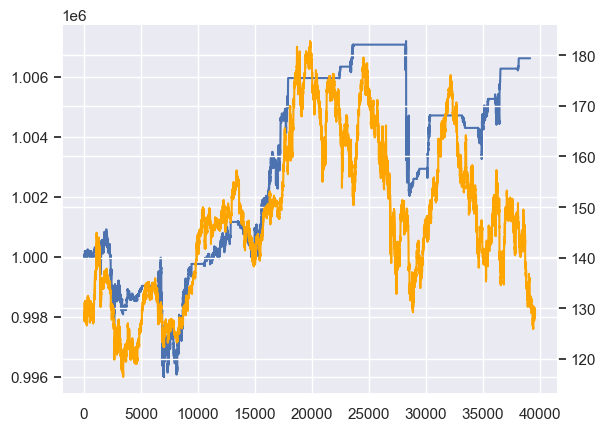

In [23]:
fig, ax = plt.subplots(1,1)
plt.plot(portfolio_value)


ax.plot(capital)
ax2 = ax.twinx()
ax2.plot(data.Close, color='orange')

In [21]:
# Para el corto es cost = row.Close * N_SHARES * (COM)


In [ ]:
df = pd.DataFrame()
df["value"] = portfolio_value
df["rets"] = df.value.pct_change()
df.dropna(inplace=True)

mean = df.rets.mean()
std = df.rets.std()

In [35]:
annual_rets = mean * (60/5) * (6.5) * (252)  # anualizado
annual_std = std * np.sqrt((60/5) * (6.5) * (252))


In [36]:
annual_rets / annual_std

np.float64(7.437526444662262e-09)

In [31]:
p = np.array(portfolio_value)
mean = p.mean(axis=0)
std = p.std(axis=0)
mean/std

np.float64(314.69366548333954)